### Importação dos dados



In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja['Loja'] = 'Loja 1'

loja2 = pd.read_csv(url2)
loja2['Loja'] = 'Loja 2'

loja3 = pd.read_csv(url3)
loja3['Loja'] = 'Loja 3'

loja4 = pd.read_csv(url4)
loja4['Loja'] = 'Loja 4'

df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


# 1. Análise do faturamento


In [16]:
faturamento_por_loja = df.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
print('\nFaturamento total por loja (só Preço):\n', faturamento_por_loja)


Faturamento total por loja (só Preço):
 Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


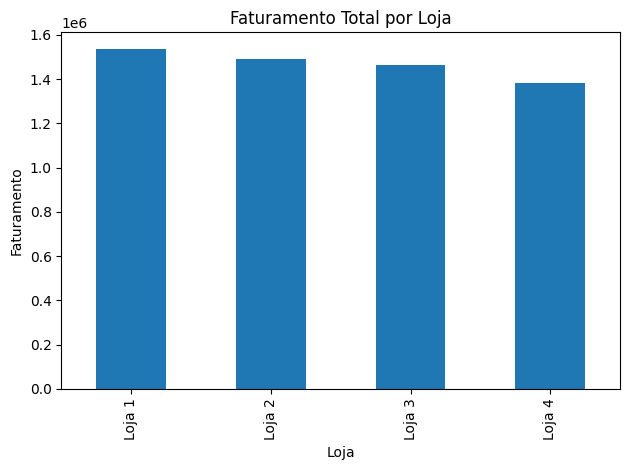

In [35]:
faturamento_por_loja.plot(kind='bar', title='Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [17]:
vendas_categoria_loja = df.groupby(['Loja', 'Categoria do Produto']).size()
print('\nVendas por categoria em cada loja:\n', vendas_categoria_loja)


Vendas por categoria em cada loja:
 Loja    Categoria do Produto 
Loja 1  brinquedos               324
        eletrodomesticos         312
        eletronicos              448
        esporte e lazer          284
        instrumentos musicais    182
        livros                   173
        moveis                   465
        utilidades domesticas    171
Loja 2  brinquedos               313
        eletrodomesticos         305
        eletronicos              422
        esporte e lazer          275
        instrumentos musicais    224
        livros                   197
        moveis                   442
        utilidades domesticas    181
Loja 3  brinquedos               315
        eletrodomesticos         278
        eletronicos              451
        esporte e lazer          277
        instrumentos musicais    177
        livros                   185
        moveis                   499
        utilidades domesticas    177
Loja 4  brinquedos               338
        

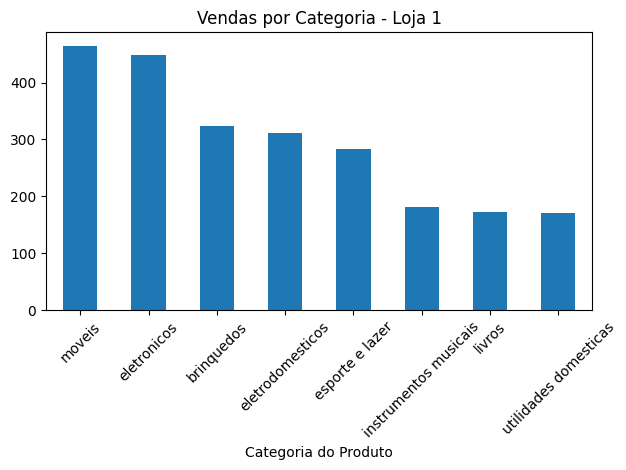

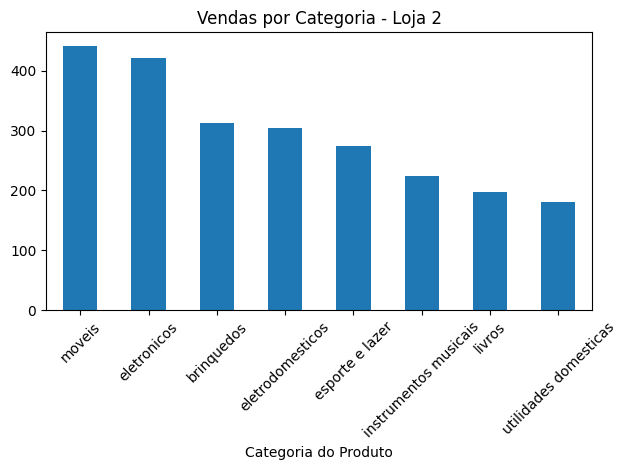

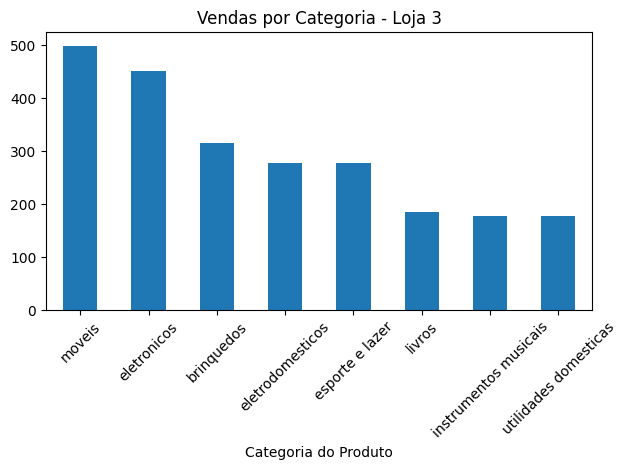

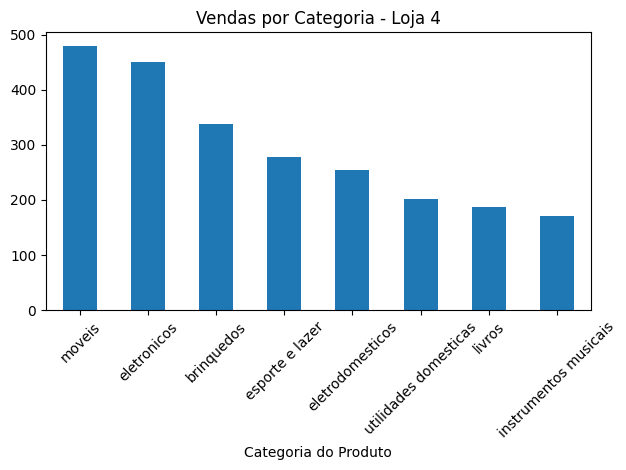

In [18]:
lojas = df['Loja'].unique()

for loja_nome in lojas:
    dados = df[df['Loja'] == loja_nome]
    contagem = dados['Categoria do Produto'].value_counts()
    contagem.plot(kind='bar', title=f'Vendas por Categoria - {loja_nome}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Média de Avaliação das Lojas

In [19]:
media_avaliacao = df.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print('\nMédia de avaliação por loja:\n', media_avaliacao)


Média de avaliação por loja:
 Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


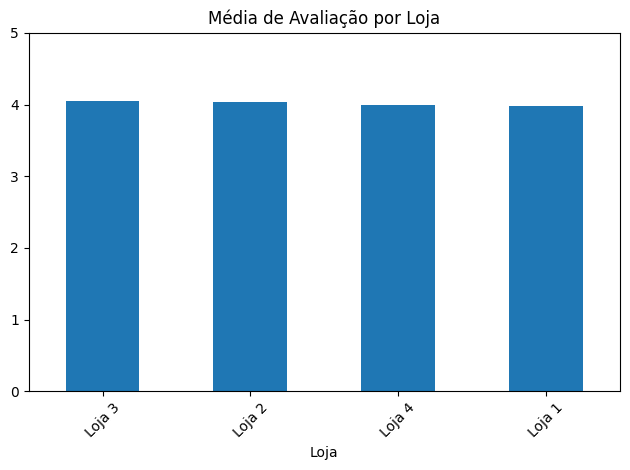

In [22]:
media_avaliacao.plot(kind='bar', title='Média de Avaliação por Loja')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos


Top 5 Mais Vendidos - Loja 1:
 Produto
TV Led UHD 4K         60
Guarda roupas         60
Micro-ondas           60
Secadora de roupas    58
Blocos de montar      56
Name: count, dtype: int64

Bottom 5 Menos Vendidos - Loja 1:
 Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64


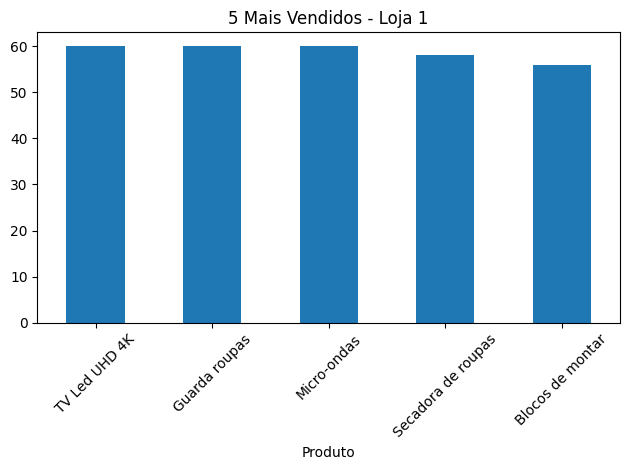

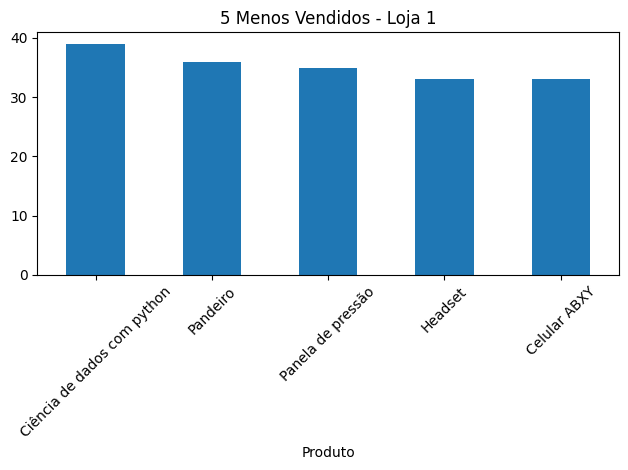


Top 5 Mais Vendidos - Loja 2:
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Bottom 5 Menos Vendidos - Loja 2:
 Produto
Fone de ouvido       37
Poltrona             35
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64


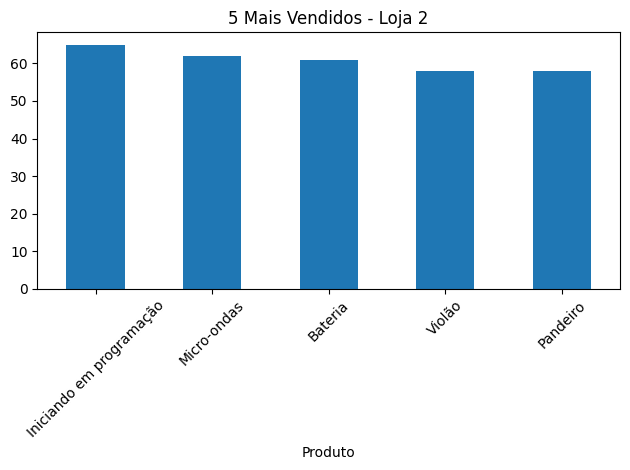

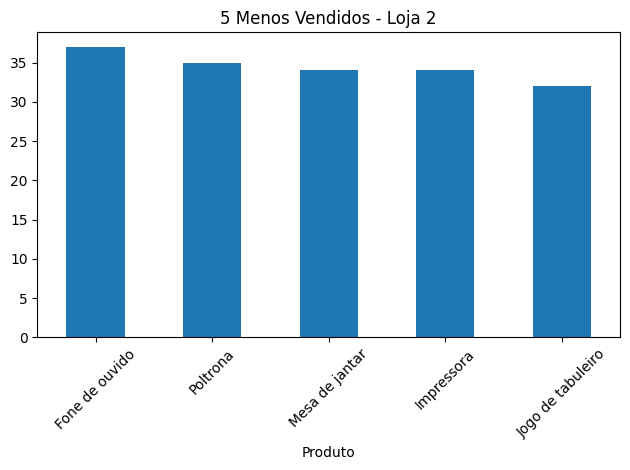


Top 5 Mais Vendidos - Loja 3:
 Produto
Kit banquetas      57
Cama king          56
Mesa de jantar     56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64

Bottom 5 Menos Vendidos - Loja 3:
 Produto
Guitarra            38
Mochila             36
Micro-ondas         36
Jogo de copos       36
Blocos de montar    35
Name: count, dtype: int64


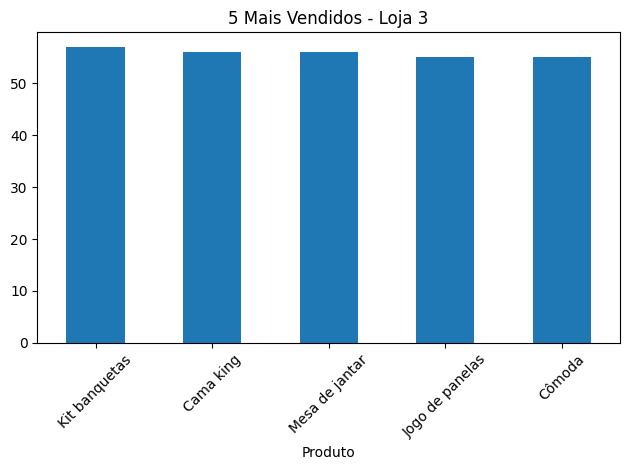

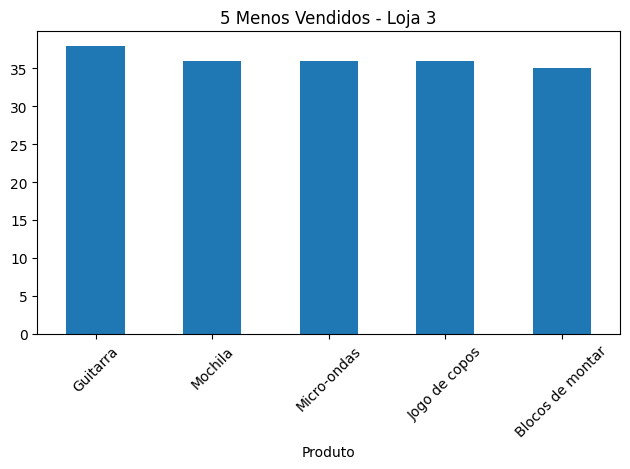


Top 5 Mais Vendidos - Loja 4:
 Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56
Cama king                  56
Cômoda                     55
Name: count, dtype: int64

Bottom 5 Menos Vendidos - Loja 4:
 Produto
Lavadora de roupas             38
Ciência de dados com python    38
Violão                         37
Guarda roupas                  34
Guitarra                       33
Name: count, dtype: int64


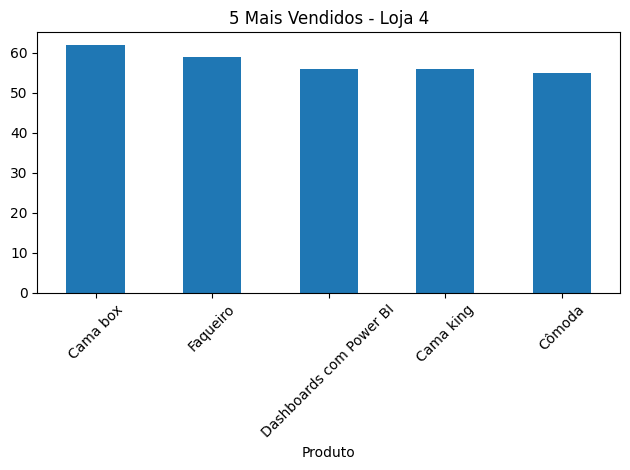

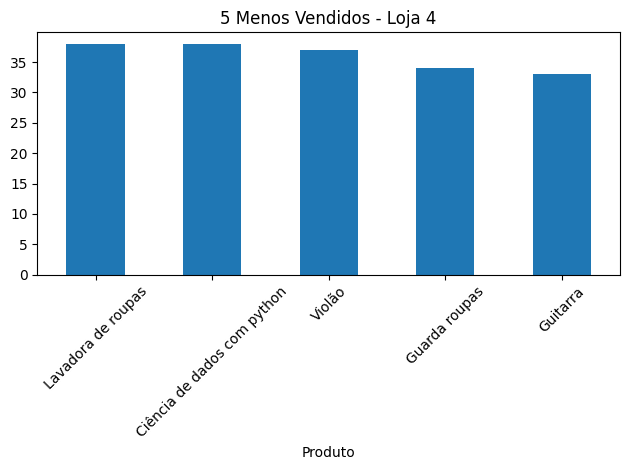

In [36]:
lojas = df['Loja'].unique()

for loja_nome in lojas:
    dados = df[df['Loja'] == loja_nome]
    contagem = dados['Produto'].value_counts()

    Top5 = contagem.head(5)
    bottom5 = contagem.tail(5)

        # Exibir resultados no console
    print(f'\nTop 5 Mais Vendidos - {loja_nome}:\n', Top5)
    print(f'\nBottom 5 Menos Vendidos - {loja_nome}:\n', bottom5)
    
    Top5.plot(kind='bar', title=f'5 Mais Vendidos - {loja_nome}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    bottom5.plot(kind='bar', title=f'5 Menos Vendidos - {loja_nome}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Frete Médio por Loja


In [25]:
custo_medio_frete_loja = df.groupby('Loja')['Frete'].mean()
print('\nCusto médio de frete por loja:\n', custo_medio_frete_loja)


Custo médio de frete por loja:
 Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


# Relatório Final

Objetivo: O objetivo desta análise foi comparar o desempenho de quatro lojas para decidir qual 
delas deve ser vendida. Consideramos diferentes fatores, como faturamento, categorias de produtos, 
avaliação dos clientes, produtos mais e menos vendidos e custo de frete.

Análise dos Fatores:

Faturamento Total:

A Loja 1 teve o maior faturamento, com R$ 1.534.509,12, destacando-se nesse aspecto.

Loja 4 teve o menor faturamento, com R$ 1.384.497,58, o que indicou um desempenho financeiro
mais fraco.

Categorias de Produtos Mais e Menos Vendidas:

A Loja 4 teve uma boa distribuição de vendas entre diversas categorias, o que demonstra um 
bom mix de produtos.

Loja 1 também teve um bom desempenho em várias categorias, mas com um pouco mais de concentração 
em certos produtos, o que pode ser um indicativo de especialização.

Avaliação dos Clientes:

A Loja 3 obteve a melhor avaliação média (4.05), com boas notas de satisfação dos clientes.

Loja 1 teve a pior avaliação (3.98), indicando uma menor satisfação em comparação às outras lojas.

Custo de Frete:

A Loja 4 apresentou o menor custo de frete (R$ 31.28), o que a torna mais eficiente em termos 
de gastos logísticos.

A Loja 1 teve o maior custo de frete (R$ 34.69), o que pode representar um gasto excessivo.

Conclusão: Apesar de a Loja 1 ter o maior faturamento, ela apresenta o frete mais caro e a pior 
avaliação de clientes. Esses pontos tornam a loja menos vantajosa em comparação com as outras.

Com base nesses critérios, a Loja 1 deve ser vendida, pois, apesar de um bom faturamento, 
a combinação do custo de frete elevado e a avaliação mais baixa dos clientes indica uma 
necessidade de melhorias. O equilíbrio de dados em outras lojas, como a Loja 4, que possui 
um custo de frete mais baixo e uma avaliação melhor, faz dela uma opção mais atrativa para 
manter em operação.

# Extra

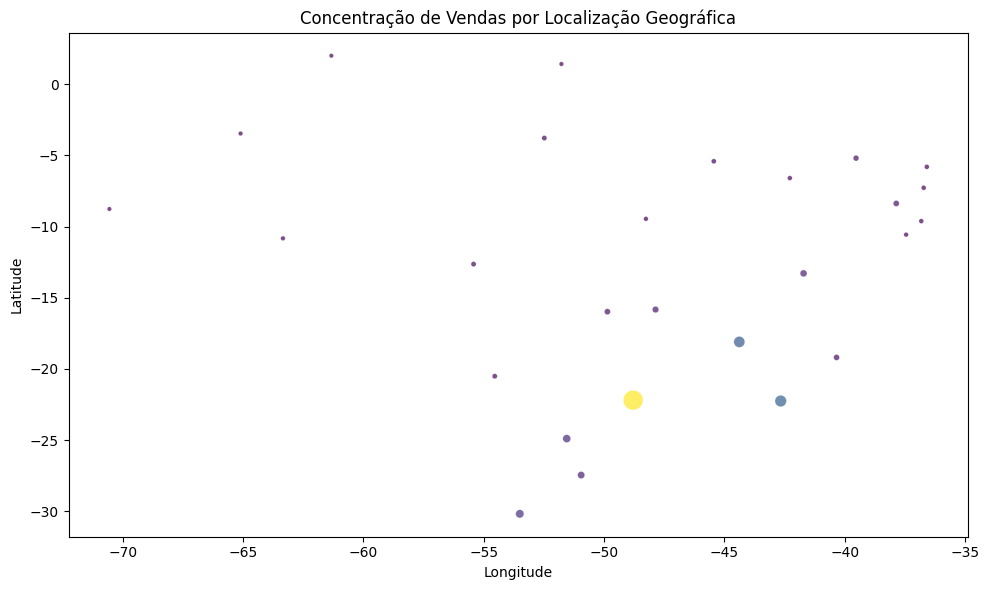

In [42]:
df_geografico = df.groupby(['lat', 'lon']).size().reset_index(name='Vendas')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', size='Vendas', sizes=(10, 200), data=df_geografico, hue='Vendas', palette='viridis', legend=None, alpha=0.7)

plt.title('Concentração de Vendas por Localização Geográfica')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()